<a href="https://colab.research.google.com/github/alessandroadessi95/alessandroadessi95/blob/main/A_data_walk_into_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A "data" walk into e-commerce
## Introduction
With the growth of e-commerce it's really important customers satisfaction. All the best business teams in e-commerce companies are focused on customers satisfaction. 

Between company and customers there are a lots of processes that directly or not contributes to customers satisfacton. There are several steps that help companies to understand the impact of process on their customers.

First of all it's really important to collect good data. In order to collect good data the main action is to give responsibilities to the owner of producing data. In e-commerce the big amount of data come from the use of web site or app.

When the step of collecting data is ok, then we need to explore and familiarize with data. This is a crucial point, because only understanding data it's possible to improve the business process and customers happiness.

Then is possible to improve customer experience adding new features, like adding an estimation delivery time, using machine learning models to predict delivery date.

There is also an hided actor behind these steps: the pipeline architecture. Especially in old companies the architecture is with on premis systems, and usally it is really difficult and slow to improve, not only for technical reasons but also for business culture.

## Overview
In this notebook I will show some part of this steps, focusing on data analysis and ML model to predict delivery date. I will use the dataset aviable in Kaggle "Brazilian e-commerce public dataset by Olist". For more information visit https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce, in the following the data schema:

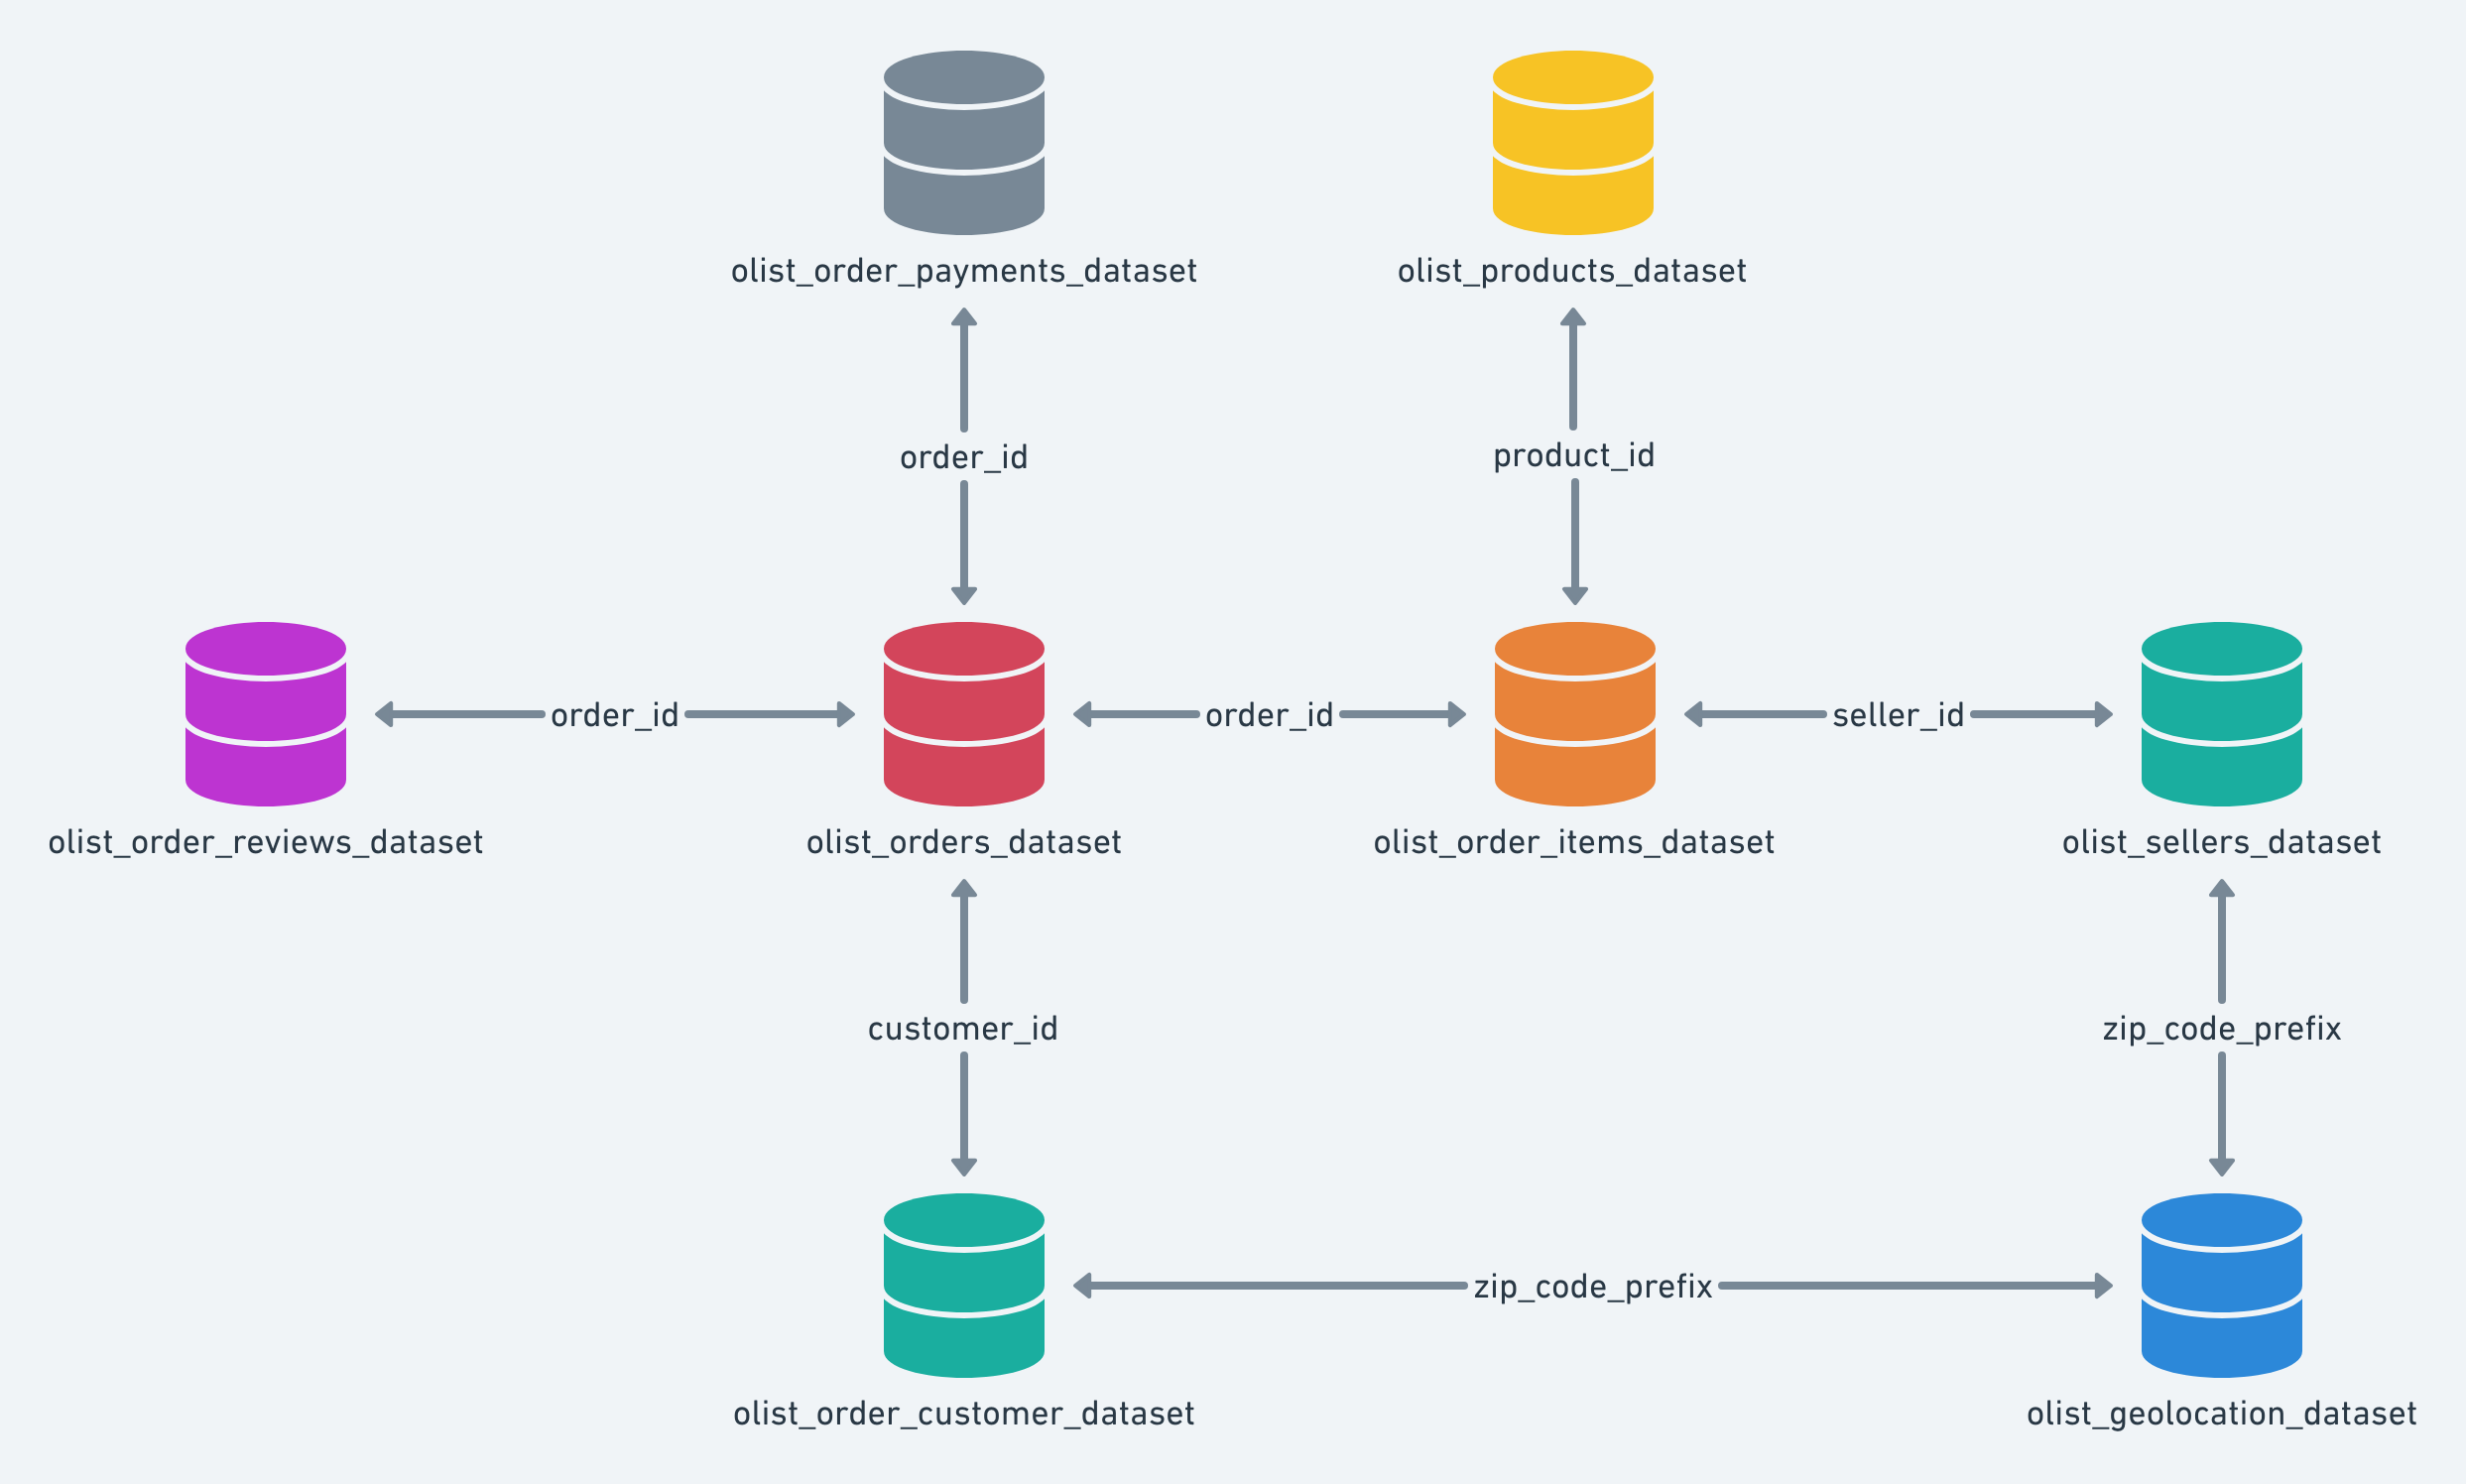



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import month_name as mn
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
path = '/content/drive/MyDrive/Olist Data/'

## Dataset overview

In [ ]:
orders = pd.read_csv(path+'olist_orders_dataset.csv')
products = pd.read_csv(path+'olist_products_dataset.csv')
items = pd.read_csv(path+'olist_order_items_dataset.csv')
customers = pd.read_csv(path+'olist_customers_dataset.csv')
sellers = pd.read_csv(path+'olist_sellers_dataset.csv')
location = pd.read_csv(path+'olist_geolocation_dataset.csv')

In [ ]:
dataset_list = [orders, products, items, customers, sellers, location]
dataset_name = ['orders', 'products', 'items', 'customers', 'sellers', 'location']

dataset_dict = dict(zip(dataset_name, dataset_list))

In [ ]:
def print_item_dict(dic: dict, name:str=None, function=None):#function with only dataframe parameter!
  if function == None: #no function
    if name == None:
      for key, value in dic.items():
        print(key.upper())
        display(value)
        print('')
    else: #yes name
      for key, value in dic.items():
        print(key.upper()+'_'+name.upper())
        display(value)
        print('')
  else: #yes function
    if name == None: #no name
      for key, value in dic.items():
        print(key.upper())
        display(function(value))
        print('')
    else: #yes name
      for key, value in dic.items():
        print(key.upper()+'_'+name.upper())
        display(function(value))
        print('')

In [ ]:
print_item_dict(dataset_dict)

ORDERS


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00



PRODUCTS


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0



ITEMS


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72



CUSTOMERS


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS



SELLERS


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS



LOCATION


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.07,-52.01,tapejara,RS
1000159,99900,-27.88,-52.22,getulio vargas,RS
1000160,99950,-28.07,-52.01,tapejara,RS
1000161,99980,-28.39,-51.85,david canabarro,RS


If we imagine to be in a business scenario, the first important step is to understand the quality of the data ingestion. We are collecting data from a website and we must know if data are trustable. The more we know and understand data, the more users will trust it.

To reach this aim I will create a function to get the info from each table.

In [ ]:
def ds_quality(ds):
  pd.set_option('display.precision', 2)
  metrics_index = ['unique_values','data_type','null_perc']
  unique_values = ds.nunique()
  data_type = ds.dtypes
  null_perc = ds.isna().sum()*100/len(ds)
  df = pd.DataFrame([unique_values, data_type, null_perc], index=metrics_index).T
  df.index.name = 'column_name'
  df.reset_index(level='column_name',inplace = True)
  return df

In [ ]:
print_item_dict(dataset_dict, 'quality', ds_quality)

ORDERS_QUALITY


,column_name,unique_values,data_type,null_perc
0,order_id,99441,object,0.0
1,customer_id,99441,object,0.0
2,order_status,8,object,0.0
3,order_purchase_timestamp,98875,object,0.0
4,order_approved_at,90733,object,0.16
5,order_delivered_carrier_date,81018,object,1.79
6,order_delivered_customer_date,95664,object,2.98
7,order_estimated_delivery_date,459,object,0.0



PRODUCTS_QUALITY


,column_name,unique_values,data_type,null_perc
0,product_id,32951,object,0.0
1,product_category_name,73,object,1.85
2,product_name_lenght,66,float64,1.85
3,product_description_lenght,2960,float64,1.85
4,product_photos_qty,19,float64,1.85
5,product_weight_g,2204,float64,0.01
6,product_length_cm,99,float64,0.01
7,product_height_cm,102,float64,0.01
8,product_width_cm,95,float64,0.01



ITEMS_QUALITY


,column_name,unique_values,data_type,null_perc
0,order_id,98666,object,0.0
1,order_item_id,21,int64,0.0
2,product_id,32951,object,0.0
3,seller_id,3095,object,0.0
4,shipping_limit_date,93318,object,0.0
5,price,5968,float64,0.0
6,freight_value,6999,float64,0.0



CUSTOMERS_QUALITY


,column_name,unique_values,data_type,null_perc
0,customer_id,99441,object,0.0
1,customer_unique_id,96096,object,0.0
2,customer_zip_code_prefix,14994,int64,0.0
3,customer_city,4119,object,0.0
4,customer_state,27,object,0.0



SELLERS_QUALITY


,column_name,unique_values,data_type,null_perc
0,seller_id,3095,object,0.0
1,seller_zip_code_prefix,2246,int64,0.0
2,seller_city,611,object,0.0
3,seller_state,23,object,0.0



LOCATION_QUALITY


,column_name,unique_values,data_type,null_perc
0,geolocation_zip_code_prefix,19015,int64,0.0
1,geolocation_lat,717360,float64,0.0
2,geolocation_lng,717613,float64,0.0
3,geolocation_city,8011,object,0.0
4,geolocation_state,27,object,0.0


## BI step (Data Analysis)
Imagine a path where company starts to explore data, using for example business intelligence tool, and creating a datawarehouse in order to analyze the business phenomena.

These are the really early steps of a company that wants to empower all teams in the use of data in order to find insight. And here it is the most difficult part of the job: the creation of metrics, the decision process and how to correlate these two aspects.

In the following I will propose some possible overview of the order process:

- Orders analysis (Orders trend, average value of order and its trend)
- Orders analysis linked to product categories (Average number of item per order, the hit list of items both in number of orders and value)
- Orders analysis linked to location (hit list of city with highest number of orders,hit list of city with highest value of orders)

In [ ]:
#creation of custom date field
orders["order_purchase_date"] = pd.to_datetime(orders["order_purchase_timestamp"]).dt.date
orders['order_purchase_date'] = pd.to_datetime(orders['order_purchase_date'])
orders['order_purchase_year'] = orders['order_purchase_date'].dt.strftime('%Y')
orders['order_purchase_year_month'] = orders['order_purchase_date'].dt.strftime('%Y%m')
orders['order_purchase_month'] = orders['order_purchase_date'].dt.strftime('%B')
orders['order_purchase_day'] = orders['order_purchase_date'].dt.strftime('%d')

In [ ]:
#dataset with number of orders per date
orders_number_per_date = orders.groupby(['order_purchase_date','order_purchase_year','order_purchase_year_month','order_purchase_month','order_purchase_day']).order_id.nunique().reset_index()
print(orders_number_per_date)

    order_purchase_date order_purchase_year order_purchase_year_month  \
0            2016-09-04                2016                    201609   
1            2016-09-05                2016                    201609   
2            2016-09-13                2016                    201609   
3            2016-09-15                2016                    201609   
4            2016-10-02                2016                    201610   
..                  ...                 ...                       ...   
629          2018-09-29                2018                    201809   
630          2018-10-01                2018                    201810   
631          2018-10-03                2018                    201810   
632          2018-10-16                2018                    201810   
633          2018-10-17                2018                    201810   

    order_purchase_month order_purchase_day  order_id  
0              September                 04         1  
1          

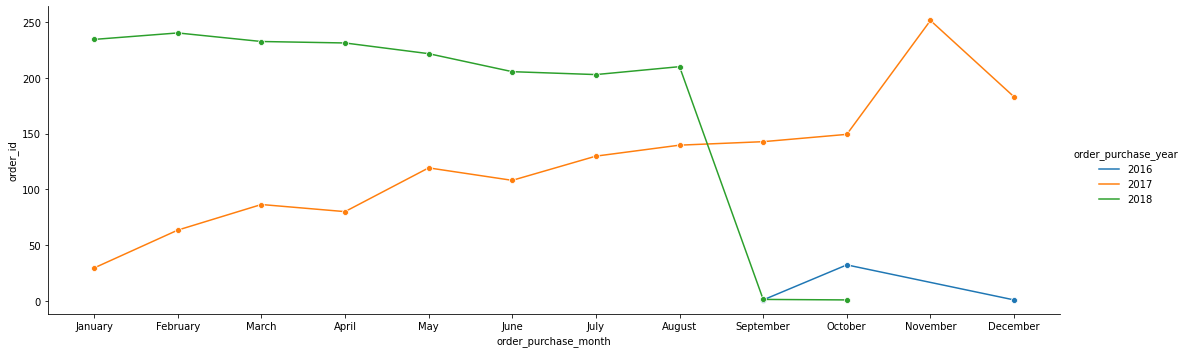

In [ ]:
#number of orders per date
months = mn[1:]
orders_number_per_date.order_purchase_month = pd.Categorical(orders_number_per_date.order_purchase_month, categories=months, ordered=True)

number_of_orders_per_year_chart = sns.relplot(data=orders_number_per_date, x='order_purchase_month', y='order_id', hue='order_purchase_year', aspect=3, marker='o',kind='line',ci=None)

In [ ]:
#adding date info to items
items_with_date = items.merge(orders[['order_id','order_purchase_date','order_purchase_year','order_purchase_month','order_purchase_year_month','order_purchase_day']], on='order_id')
items_with_date

column_name,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_date,order_purchase_year,order_purchase_month,order_purchase_year_month,order_purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13,2017,September,201709,13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26,2017,April,201704,26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14,2018,January,201801,14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08,2018,August,201808,08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04,2017,February,201702,04
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018-04-23,2018,April,201804,23
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018-07-14,2018,July,201807,14
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017-10-23,2017,October,201710,23
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017-08-14,2017,August,201708,14


In [ ]:
#average number of item per order
avg_items_orders = items_with_date.groupby(['order_id','order_purchase_month','order_purchase_year']).order_item_id.mean().reset_index()
avg_items_orders

,order_id,order_purchase_month,order_purchase_year,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,September,2017,1.0
1,00018f77f2f0320c557190d7a144bdd3,April,2017,1.0
2,000229ec398224ef6ca0657da4fc703e,January,2018,1.0
3,00024acbcdf0a6daa1e931b038114c75,August,2018,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,February,2017,1.0
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,April,2018,1.0
98662,fffcd46ef2263f404302a634eb57f7eb,July,2018,1.0
98663,fffce4705a9662cd70adb13d4a31832d,October,2017,1.0
98664,fffe18544ffabc95dfada21779c9644f,August,2017,1.0


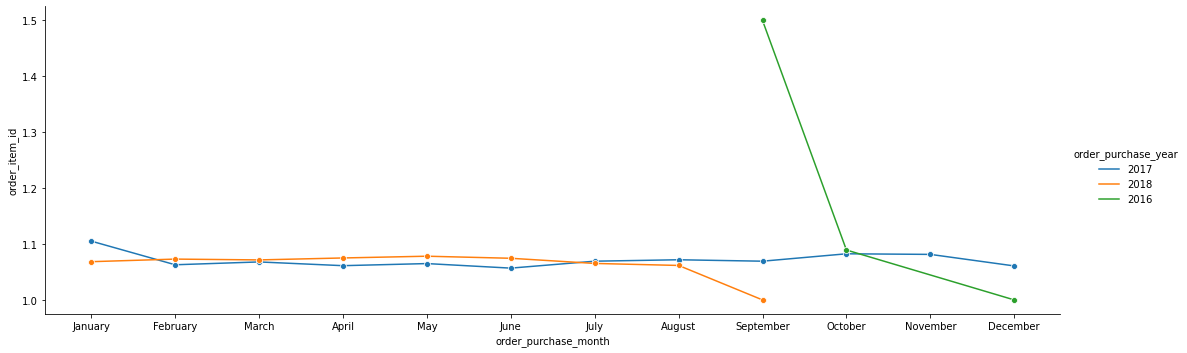

In [ ]:
#chart for average number of items per order over years
avg_items_orders.order_purchase_month = pd.Categorical(avg_items_orders.order_purchase_month, categories=months, ordered=True)

avg_of_items_per_year_chart = sns.relplot(data=avg_items_orders, x='order_purchase_month', y='order_item_id', hue='order_purchase_year', aspect=3, marker='o',kind='line',ci=None)

In [ ]:
#average price per order
avg_price_orders = items_with_date.groupby(['order_id','order_purchase_month','order_purchase_year']).price.mean().reset_index()
avg_price_orders

,order_id,order_purchase_month,order_purchase_year,price
0,00010242fe8c5a6d1ba2dd792cb16214,September,2017,58.90
1,00018f77f2f0320c557190d7a144bdd3,April,2017,239.90
2,000229ec398224ef6ca0657da4fc703e,January,2018,199.00
3,00024acbcdf0a6daa1e931b038114c75,August,2018,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,February,2017,199.90
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,April,2018,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,July,2018,350.00
98663,fffce4705a9662cd70adb13d4a31832d,October,2017,99.90
98664,fffe18544ffabc95dfada21779c9644f,August,2017,55.99


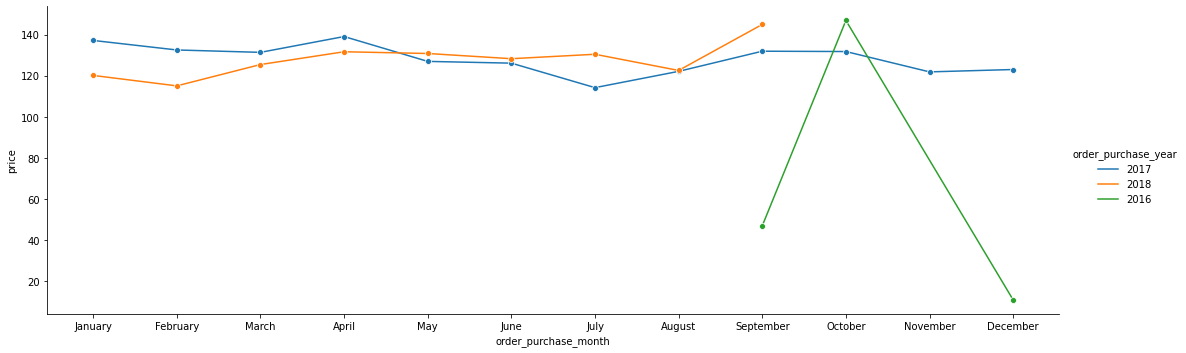

In [ ]:
#average price per order over years
avg_price_orders.order_purchase_month = pd.Categorical(avg_price_orders.order_purchase_month, categories=months, ordered=True)

avg_price_per_year_chart = sns.relplot(data=avg_price_orders, x='order_purchase_month', y='price', hue='order_purchase_year', aspect=3, marker='o',kind='line',ci=None)

In [ ]:
#dataset of orders and product info
items_products = items_with_date.merge(products[['product_id','product_category_name','product_name_lenght']], on='product_id')
items_products

column_name,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_date,order_purchase_year,order_purchase_month,order_purchase_year_month,order_purchase_day,product_category_name,product_name_lenght
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017-09-13,2017,September,201709,13,cool_stuff,58.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,2017-06-28,2017,June,201706,28,cool_stuff,58.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,2018-05-18,2018,May,201805,18,cool_stuff,58.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,2017-08-01,2017,August,201708,01,cool_stuff,58.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,2017-08-10,2017,August,201708,10,cool_stuff,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,2018-07-13,2018,July,201807,13,ferramentas_jardim,37.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,2018-08-18,2018,August,201808,18,moveis_decoracao,30.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,2017-06-01,2017,June,201706,01,relogios_presentes,33.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,2017-12-18,2017,December,201712,18,esporte_lazer,32.0


In [ ]:
#dataset of sales and number of product grouped by product category
items_products['order_product_id']=items_products['order_id']+'|'+items_products['order_item_id'].astype(str)
product_category_sales = items_products.groupby(['product_category_name','order_purchase_year']).agg(number_products_sales=('order_product_id','count'), gross_sales = ('price','sum')).reset_index()

product_category_sales

,product_category_name,order_purchase_year,number_products_sales,gross_sales
0,agro_industria_e_comercio,2017,61,29179.20
1,agro_industria_e_comercio,2018,151,43351.27
2,alimentos,2016,1,79.90
3,alimentos,2017,127,8737.89
4,alimentos,2018,382,20575.62
...,...,...,...,...
170,telefonia_fixa,2017,157,30372.84
171,telefonia_fixa,2018,102,28505.28
172,utilidades_domesticas,2016,12,1287.07
173,utilidades_domesticas,2017,2906,231073.49


In [ ]:
from pandas.io.formats.style_render import DataFrame
def split_dataset_by_distinct_column_values(df:DataFrame, column_name:str, new_df_name:str):
  dic = {}
  sorted_values = np.sort(list(df[column_name].unique()))
  new_df_name = new_df_name+'_'
  for value in sorted_values:
    dic[new_df_name+'{0}'.format(value)] = df[df[column_name]==value].reset_index()
  return dic

In [ ]:
product_category_analysis = split_dataset_by_distinct_column_values(product_category_sales, 'order_purchase_year', 'product_category_sales')

In [ ]:
print_item_dict(product_category_analysis)

PRODUCT_CATEGORY_SALES_2016


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
0,2,alimentos,2016,1,79.90
1,15,audio,2016,2,156.99
2,18,automotivo,2016,12,1833.25
3,21,bebes,2016,14,1630.16
4,26,beleza_saude,2016,51,4687.48
5,29,brinquedos,2016,27,4465.09
6,32,cama_mesa_banho,2016,8,478.99
7,45,climatizacao,2016,10,1707.09
8,48,consoles_games,2016,10,3882.26
9,61,cool_stuff,2016,8,1111.00



PRODUCT_CATEGORY_SALES_2017


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
0,0,agro_industria_e_comercio,2017,61,29179.20
1,3,alimentos,2017,127,8737.89
2,5,alimentos_bebidas,2017,131,7447.74
3,7,artes,2017,41,9291.79
4,9,artes_e_artesanato,2017,2,151.89
...,...,...,...,...,...
67,162,sinalizacao_e_seguranca,2017,46,4442.99
68,164,tablets_impressao_imagem,2017,61,6260.45
69,167,telefonia,2017,2198,142814.64
70,170,telefonia_fixa,2017,157,30372.84



PRODUCT_CATEGORY_SALES_2018


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
0,1,agro_industria_e_comercio,2018,151,43351.27
1,4,alimentos,2018,382,20575.62
2,6,alimentos_bebidas,2018,147,7731.74
3,8,artes,2018,168,14910.85
4,10,artes_e_artesanato,2018,22,1662.12
...,...,...,...,...,...
67,163,sinalizacao_e_seguranca,2018,153,17066.24
68,165,tablets_impressao_imagem,2018,22,1267.96
69,168,telefonia,2018,2336,180293.31
70,171,telefonia_fixa,2018,102,28505.28


In [ ]:
#the hit list of the first 10 product category by gross sales
hit_list_product_category_sales_2016 = product_category_analysis['product_category_sales_2016'].sort_values('gross_sales', ascending=False).head(10)
display(hit_list_product_category_sales_2016)
hit_list_product_category_sales_2017 = product_category_analysis['product_category_sales_2017'].sort_values('gross_sales', ascending=False).head(10)
display(hit_list_product_category_sales_2017)
hit_list_product_category_sales_2018 = product_category_analysis['product_category_sales_2018'].sort_values('gross_sales', ascending=False).head(10)
display(hit_list_product_category_sales_2018)

,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
23,131,moveis_decoracao,2016,69,5880.78
25,149,perfumaria,2016,33,5688.70
4,26,beleza_saude,2016,51,4687.48
5,29,brinquedos,2016,27,4465.09
8,48,consoles_games,2016,10,3882.26
27,158,relogios_presentes,2016,5,3360.24
11,75,esporte_lazer,2016,19,3333.64
2,18,automotivo,2016,12,1833.25
7,45,climatizacao,2016,10,1707.09
3,21,bebes,2016,14,1630.16


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
13,33,cama_mesa_banho,2017,5223,498440.43
65,159,relogios_presentes,2017,2283,492794.50
11,27,beleza_saude,2017,3668,481755.71
32,76,esporte_lazer,2017,4095,452148.84
44,108,informatica_acessorios,2017,3098,405078.69
26,62,cool_stuff,2017,2315,393620.65
54,132,moveis_decoracao,2017,4147,337213.12
12,30,brinquedos,2017,2602,307975.48
40,97,ferramentas_jardim,2017,2463,268882.71
8,19,automotivo,2017,1604,243255.71


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
11,28,beleza_saude,2018,5951,772238.15
66,160,relogios_presentes,2018,3703,708850.94
13,34,cama_mesa_banho,2018,5884,538069.26
32,77,esporte_lazer,2018,4527,532566.49
44,109,informatica_acessorios,2018,4708,505476.31
71,174,utilidades_domesticas,2018,4046,399888.10
54,133,moveis_decoracao,2018,4118,386668.59
8,20,automotivo,2018,2619,347631.15
9,23,bebes,2018,1776,256800.70
26,63,cool_stuff,2018,1473,240559.20


In [ ]:
#the hit list of the first 10 product category by number of products sales
hit_list_n_product_category_sales_2016 = product_category_analysis['product_category_sales_2016'].sort_values('number_products_sales', ascending=False).head(10)
display(hit_list_n_product_category_sales_2016)
hit_list_n_product_category_sales_2017 = product_category_analysis['product_category_sales_2017'].sort_values('number_products_sales', ascending=False).head(10)
display(hit_list_n_product_category_sales_2017)
hit_list_n_product_category_sales_2018 = product_category_analysis['product_category_sales_2018'].sort_values('number_products_sales', ascending=False).head(10)
display(hit_list_n_product_category_sales_2018)

,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
23,131,moveis_decoracao,2016,69,5880.78
4,26,beleza_saude,2016,51,4687.48
25,149,perfumaria,2016,33,5688.70
5,29,brinquedos,2016,27,4465.09
19,107,informatica_acessorios,2016,21,1399.32
11,75,esporte_lazer,2016,19,3333.64
3,21,bebes,2016,14,1630.16
22,124,market_place,2016,13,1306.19
30,172,utilidades_domesticas,2016,12,1287.07
2,18,automotivo,2016,12,1833.25


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
13,33,cama_mesa_banho,2017,5223,498440.43
54,132,moveis_decoracao,2017,4147,337213.12
32,76,esporte_lazer,2017,4095,452148.84
11,27,beleza_saude,2017,3668,481755.71
44,108,informatica_acessorios,2017,3098,405078.69
71,173,utilidades_domesticas,2017,2906,231073.49
12,30,brinquedos,2017,2602,307975.48
40,97,ferramentas_jardim,2017,2463,268882.71
26,62,cool_stuff,2017,2315,393620.65
65,159,relogios_presentes,2017,2283,492794.50


,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
11,28,beleza_saude,2018,5951,772238.15
13,34,cama_mesa_banho,2018,5884,538069.26
44,109,informatica_acessorios,2018,4708,505476.31
32,77,esporte_lazer,2018,4527,532566.49
54,133,moveis_decoracao,2018,4118,386668.59
71,174,utilidades_domesticas,2018,4046,399888.10
66,160,relogios_presentes,2018,3703,708850.94
8,20,automotivo,2018,2619,347631.15
69,168,telefonia,2018,2336,180293.31
40,98,ferramentas_jardim,2018,1879,215013.87


In [ ]:
#dataset with the first 10 product by sales, 2017 e 2018
ds_to_union_product_sales = [hit_list_product_category_sales_2017,hit_list_product_category_sales_2018]
union_hit_list_product_sales = pd.concat(ds_to_union_product_sales)
display(union_hit_list_product_sales)

,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
13,33,cama_mesa_banho,2017,5223,498440.43
65,159,relogios_presentes,2017,2283,492794.50
11,27,beleza_saude,2017,3668,481755.71
32,76,esporte_lazer,2017,4095,452148.84
44,108,informatica_acessorios,2017,3098,405078.69
26,62,cool_stuff,2017,2315,393620.65
54,132,moveis_decoracao,2017,4147,337213.12
12,30,brinquedos,2017,2602,307975.48
40,97,ferramentas_jardim,2017,2463,268882.71
8,19,automotivo,2017,1604,243255.71


In [ ]:
#dataset with the first 10 product by number, 2017 e 2018
ds_to_union_n_product_sales = [hit_list_n_product_category_sales_2017,hit_list_n_product_category_sales_2018]
union_hit_list_n_product_sales = pd.concat(ds_to_union_n_product_sales)
display(union_hit_list_product_sales)

,index,product_category_name,order_purchase_year,number_products_sales,gross_sales
13,33,cama_mesa_banho,2017,5223,498440.43
65,159,relogios_presentes,2017,2283,492794.50
11,27,beleza_saude,2017,3668,481755.71
32,76,esporte_lazer,2017,4095,452148.84
44,108,informatica_acessorios,2017,3098,405078.69
26,62,cool_stuff,2017,2315,393620.65
54,132,moveis_decoracao,2017,4147,337213.12
12,30,brinquedos,2017,2602,307975.48
40,97,ferramentas_jardim,2017,2463,268882.71
8,19,automotivo,2017,1604,243255.71


sales


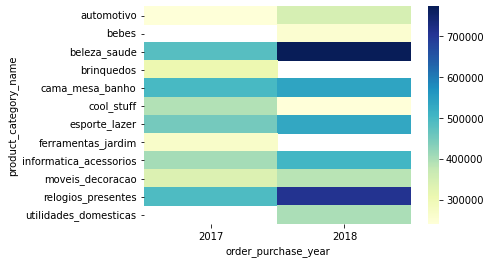


numbers


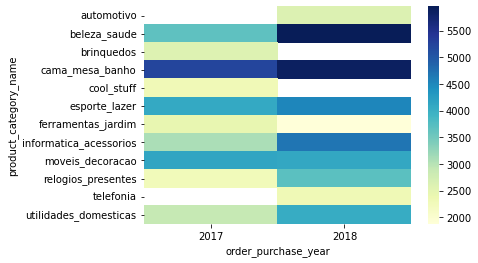

In [ ]:
#heatmap of gross sales and numbers over 2017 and 2018
pivot_product_sales = union_hit_list_product_sales.pivot(index='product_category_name',columns='order_purchase_year',values='gross_sales')
pivot_n_product_sales = union_hit_list_n_product_sales.pivot(index='product_category_name',columns='order_purchase_year',values='number_products_sales')

sns.heatmap(pivot_product_sales, cmap='YlGnBu')
print('sales')
plt.show()

print('')

sns.heatmap(pivot_n_product_sales, cmap='YlGnBu')
print('numbers')
plt.show()

Work in progress...(Orders analysis linked to location)

In [ ]:
#there is only one zip linked to customer_id? YES
g = customers[['customer_id','customer_zip_code_prefix']]
group = g.groupby('customer_id')
group.filter(lambda x: len(x) > 1)  

column_name,customer_id,customer_zip_code_prefix


In [ ]:
#dataset with order, customer, price and location info
#a customer id has more than one zip 

customer_location = pd.merge(customers, location, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
customer_location

"""
duplicate rows for latitude and longitude two tentative:
1) group by and then mean(better, but it's necessary to verify that there aren't high difference between lat e long for the same customer_id and zip) 
2) round values of lat e long
"""

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.50,-47.40,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.48,-47.39,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.52,-47.40,franca,SP
...,...,...,...,...,...,...,...,...,...,...
15083450,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.82,-49.24,aparecida de goiania,GO
15083451,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.82,-49.24,aparecida de goiania,GO
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.82,-49.24,aparecida de goiania,GO
15083453,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,99043,-28.23,-52.47,passo fundo,RS
